# This code calculates fold change for each holin mutation within the neighborhood region of radius $r_c=8$ surrounding the mutation point $m$
# $\text{Fold-Change (FC)} = \frac{\text{Physicochemical property in the mutant holin}}{\text{Physicochemical property in the wild-type holin}}$

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import svm
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
print(np.__version__)
print(pd.__version__)
import sys
print(sys.version)
import sklearn
import pingouin as pg
import import_ipynb
from amp_ml_functions import *
from scipy.stats import ks_2samp
from matplotlib.ticker import AutoMinorLocator
from scipy.stats import pearsonr
from statsmodels.stats.weightstats import ztest as ztest
from sklearn.preprocessing import StandardScaler
from adjustText import adjust_text  # Import adjust_text
from pandas.api.types import is_numeric_dtype

1.25.2
2.0.3
3.11.4 (main, Jul  5 2023, 13:45:01) [GCC 11.2.0]


# Feature extraction from $propy$

In [260]:
seq_list='holin_mutated_seq_around_rc_8.txt' 
Descriptors_complete(seq_list,'holin_mutants_descriptors_rc_8.csv')

In [261]:
seq_list='holin_WT_seq_around_R_8.txt' 
Descriptors_complete(seq_list,'holin_WT_descriptors_R_8.csv')

In [64]:
df=pd.read_csv('holin_mutants_descriptors_rc_8.csv')
df_mutants=df.drop(columns=['Unnamed: 0'])
df_mutants

,net_charge,AMP_Name,A,R,N,D,C,E,Q,G,...,QSOgrant41,QSOgrant42,QSOgrant43,QSOgrant44,QSOgrant45,QSOgrant46,QSOgrant47,QSOgrant48,QSOgrant49,QSOgrant50
0,4,WT,15.888,4.673,2.804,5.607,0.935,2.804,1.869,10.280,...,0.031911,0.03237,0.029870,0.033577,0.029508,0.027412,0.031059,0.029884,0.025509,0.028779
1,3,S105,16.190,4.762,2.857,5.714,0.952,2.857,1.905,10.476,...,0.031475,0.03230,0.029969,0.033744,0.029388,0.027452,0.031016,0.029995,0.025435,0.028817
2,-2,JJD246,23.077,0.000,0.000,15.385,0.000,7.692,0.000,0.000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,3,JJD248,17.647,5.882,0.000,0.000,5.882,5.882,0.000,11.765,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,3,JJD251,11.765,11.765,5.882,5.882,0.000,5.882,5.882,11.765,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0,JJD253,25.000,0.000,0.000,6.250,0.000,12.500,0.000,0.000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0,JJD404,29.412,0.000,0.000,0.000,0.000,5.882,5.882,11.765,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0,JJD405,17.647,0.000,5.882,5.882,5.882,0.000,0.000,17.647,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,2,JJD411,0.000,5.882,0.000,0.000,0.000,0.000,0.000,23.529,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,1,JJD413,5.882,5.882,0.000,5.882,0.000,0.000,0.000,17.647,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [65]:
df=pd.read_csv('holin_WT_descriptors_rc_8.csv')
df_WT=df.drop(columns=['Unnamed: 0'])
df_WT

,net_charge,AMP_Name,A,R,N,D,C,E,Q,G,...,QSOgrant41,QSOgrant42,QSOgrant43,QSOgrant44,QSOgrant45,QSOgrant46,QSOgrant47,QSOgrant48,QSOgrant49,QSOgrant50
0,4,WT_WT,15.888,4.673,2.804,5.607,0.935,2.804,1.869,10.280,...,0.031911,0.03237,0.029870,0.033577,0.029508,0.027412,0.031059,0.029884,0.025509,0.028779
1,3,S105_WT,16.190,4.762,2.857,5.714,0.952,2.857,1.905,10.476,...,0.031475,0.03230,0.029969,0.033744,0.029388,0.027452,0.031016,0.029995,0.025435,0.028817
2,0,JJD246_WT,23.077,0.000,0.000,7.692,0.000,7.692,0.000,0.000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,3,JJD248_WT,17.647,5.882,0.000,0.000,0.000,5.882,0.000,11.765,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,3,JJD251_WT,17.647,11.765,5.882,5.882,0.000,5.882,5.882,11.765,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0,JJD253_WT,25.000,0.000,0.000,6.250,0.000,12.500,0.000,0.000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0,JJD404_WT,29.412,0.000,0.000,0.000,0.000,5.882,5.882,11.765,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0,JJD405_WT,17.647,0.000,5.882,5.882,5.882,0.000,0.000,11.765,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,1,JJD411_WT,0.000,5.882,0.000,5.882,0.000,0.000,0.000,17.647,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,1,JJD413_WT,5.882,5.882,0.000,5.882,0.000,0.000,0.000,17.647,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [66]:
df = pd.read_excel('Strain-Mutation-Details.xlsx')
df

,Strain,Mutation
0,WT,WT
1,S105,S105
2,JJD246,H7D
3,JJD248,F94C
4,JJD251,A99V
5,JJD253,L10M
6,JJD404,I21V
7,JJD405,V45G
8,JJD411,D85G
9,JJD413,I87L


In [67]:
pairs_dict = dict(zip(df['Strain'], df['Strain']))
pairs_dict

{'WT': 'WT',
 'S105': 'S105',
 'JJD246': 'JJD246',
 'JJD248': 'JJD248',
 'JJD251': 'JJD251',
 'JJD253': 'JJD253',
 'JJD404': 'JJD404',
 'JJD405': 'JJD405',
 'JJD411': 'JJD411',
 'JJD413': 'JJD413',
 'JJD414': 'JJD414',
 'JJD415': 'JJD415',
 'JJD426': 'JJD426',
 'JJD428': 'JJD428',
 'JJD432': 'JJD432',
 'JJD434': 'JJD434',
 'JJD436': 'JJD436'}

In [68]:
# Inverting the dictionary: values become unique keys, and keys become values in a list
inverted_dict = {}
for key, value in pairs_dict.items():
    inverted_dict.setdefault(value, []).append(key)

inverted_dict

{'WT': ['WT'],
 'S105': ['S105'],
 'JJD246': ['JJD246'],
 'JJD248': ['JJD248'],
 'JJD251': ['JJD251'],
 'JJD253': ['JJD253'],
 'JJD404': ['JJD404'],
 'JJD405': ['JJD405'],
 'JJD411': ['JJD411'],
 'JJD413': ['JJD413'],
 'JJD414': ['JJD414'],
 'JJD415': ['JJD415'],
 'JJD426': ['JJD426'],
 'JJD428': ['JJD428'],
 'JJD432': ['JJD432'],
 'JJD434': ['JJD434'],
 'JJD436': ['JJD436']}

In [69]:
df_WT.set_index('AMP_Name', inplace=True)
df_WT

,net_charge,A,R,N,D,C,E,Q,G,H,...,QSOgrant41,QSOgrant42,QSOgrant43,QSOgrant44,QSOgrant45,QSOgrant46,QSOgrant47,QSOgrant48,QSOgrant49,QSOgrant50
AMP_Name,,,,,,,,,,,,,,,,,,,,,
WT_WT,4,15.888,4.673,2.804,5.607,0.935,2.804,1.869,10.280,0.935,...,0.031911,0.03237,0.029870,0.033577,0.029508,0.027412,0.031059,0.029884,0.025509,0.028779
S105_WT,3,16.190,4.762,2.857,5.714,0.952,2.857,1.905,10.476,0.952,...,0.031475,0.03230,0.029969,0.033744,0.029388,0.027452,0.031016,0.029995,0.025435,0.028817
JJD246_WT,0,23.077,0.000,0.000,7.692,0.000,7.692,0.000,0.000,7.692,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
JJD248_WT,3,17.647,5.882,0.000,0.000,0.000,5.882,0.000,11.765,0.000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
JJD251_WT,3,17.647,11.765,5.882,5.882,0.000,5.882,5.882,11.765,0.000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
JJD253_WT,0,25.000,0.000,0.000,6.250,0.000,12.500,0.000,0.000,6.250,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
JJD404_WT,0,29.412,0.000,0.000,0.000,0.000,5.882,5.882,11.765,0.000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
JJD405_WT,0,17.647,0.000,5.882,5.882,5.882,0.000,0.000,11.765,0.000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
JJD411_WT,1,0.000,5.882,0.000,5.882,0.000,0.000,0.000,17.647,0.000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [70]:
df_mutants.set_index('AMP_Name', inplace=True)
df_mutants

,net_charge,A,R,N,D,C,E,Q,G,H,...,QSOgrant41,QSOgrant42,QSOgrant43,QSOgrant44,QSOgrant45,QSOgrant46,QSOgrant47,QSOgrant48,QSOgrant49,QSOgrant50
AMP_Name,,,,,,,,,,,,,,,,,,,,,
WT,4,15.888,4.673,2.804,5.607,0.935,2.804,1.869,10.280,0.935,...,0.031911,0.03237,0.029870,0.033577,0.029508,0.027412,0.031059,0.029884,0.025509,0.028779
S105,3,16.190,4.762,2.857,5.714,0.952,2.857,1.905,10.476,0.952,...,0.031475,0.03230,0.029969,0.033744,0.029388,0.027452,0.031016,0.029995,0.025435,0.028817
JJD246,-2,23.077,0.000,0.000,15.385,0.000,7.692,0.000,0.000,0.000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
JJD248,3,17.647,5.882,0.000,0.000,5.882,5.882,0.000,11.765,0.000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
JJD251,3,11.765,11.765,5.882,5.882,0.000,5.882,5.882,11.765,0.000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
JJD253,0,25.000,0.000,0.000,6.250,0.000,12.500,0.000,0.000,6.250,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
JJD404,0,29.412,0.000,0.000,0.000,0.000,5.882,5.882,11.765,0.000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
JJD405,0,17.647,0.000,5.882,5.882,5.882,0.000,0.000,17.647,0.000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
JJD411,2,0.000,5.882,0.000,0.000,0.000,0.000,0.000,23.529,0.000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# Calculation of fold change by dividing the two dataframes

In [71]:
fold_dict={}
for item_WT in df_WT.index:
    result = item_WT.split('_')[0]
    for item_mutants in list(inverted_dict[result]):
        row1=df_mutants.loc[item_mutants]
        row2=df_WT.loc[item_WT]

        result = row1.div(row2.replace(0, pd.NA))
        fold_dict[item_mutants]=result

In [72]:
fold_dict
df_from_dict = pd.DataFrame(fold_dict)
df_from_dict

,WT,S105,JJD246,JJD248,JJD251,JJD253,JJD404,JJD405,JJD411,JJD413,JJD414,JJD415,JJD426,JJD428,JJD432,JJD434,JJD436
net_charge,1.0,1.0,<NA>,1.0,1.0,<NA>,<NA>,<NA>,2.0,1.0,1.0,1.0,1.0,1.0,1.0,<NA>,0.666667
A,1.0,1.0,1.0,1.0,0.666686,1.0,1.0,1.0,<NA>,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
R,1.0,1.0,<NA>,1.0,1.0,<NA>,<NA>,<NA>,1.0,1.0,1.0,1.0,1.0,1.0,1.0,<NA>,1.0
N,1.0,1.0,<NA>,<NA>,1.0,<NA>,<NA>,1.0,<NA>,<NA>,<NA>,<NA>,1.0,1.0,<NA>,<NA>,<NA>
D,1.0,1.0,2.00013,<NA>,1.0,1.0,<NA>,1.0,0.0,1.0,1.0,1.0,<NA>,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
QSOgrant46,1.0,1.0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
QSOgrant47,1.0,1.0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
QSOgrant48,1.0,1.0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
QSOgrant49,1.0,1.0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [73]:
df2=df_from_dict.T
df2

,net_charge,A,R,N,D,C,E,Q,G,H,...,QSOgrant41,QSOgrant42,QSOgrant43,QSOgrant44,QSOgrant45,QSOgrant46,QSOgrant47,QSOgrant48,QSOgrant49,QSOgrant50
WT,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
S105,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
JJD246,<NA>,1.0,<NA>,<NA>,2.00013,<NA>,1.0,<NA>,<NA>,0.0,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
JJD248,1.0,1.0,1.0,<NA>,<NA>,<NA>,1.0,<NA>,1.0,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
JJD251,1.0,0.666686,1.0,1.0,1.0,<NA>,1.0,1.0,1.0,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
JJD253,<NA>,1.0,<NA>,<NA>,1.0,<NA>,1.0,<NA>,<NA>,1.0,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
JJD404,<NA>,1.0,<NA>,<NA>,<NA>,<NA>,1.0,1.0,1.0,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
JJD405,<NA>,1.0,<NA>,1.0,1.0,1.0,<NA>,<NA>,1.499958,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
JJD411,2.0,<NA>,1.0,<NA>,0.0,<NA>,<NA>,<NA>,1.333314,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
JJD413,1.0,1.0,1.0,<NA>,1.0,<NA>,<NA>,<NA>,1.0,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [74]:
import pandas as pd
from scipy.stats import pearsonr

# Filter columns without "<NA>"
valid_columns = df2.columns[df2.notna().all()]
valid_columns

Index(['I', 'K', 'MoreauBrotoAuto_Hydrophobicity1',
       'MoreauBrotoAuto_Hydrophobicity2', 'MoreauBrotoAuto_Hydrophobicity3',
       'MoreauBrotoAuto_Hydrophobicity5', 'MoreauBrotoAuto_Hydrophobicity6',
       'MoreauBrotoAuto_Hydrophobicity7', 'MoreauBrotoAuto_Hydrophobicity8',
       'MoreauBrotoAuto_Hydrophobicity9',
       ...
       'QSOgrant23', 'QSOgrant24', 'QSOgrant25', 'QSOgrant26', 'QSOgrant27',
       'QSOgrant28', 'QSOgrant29', 'QSOgrant30', 'QSOgrant31', 'QSOgrant32'],
      dtype='object', length=497)

In [75]:
df3=df2[valid_columns]
df3.head()

,I,K,MoreauBrotoAuto_Hydrophobicity1,MoreauBrotoAuto_Hydrophobicity2,MoreauBrotoAuto_Hydrophobicity3,MoreauBrotoAuto_Hydrophobicity5,MoreauBrotoAuto_Hydrophobicity6,MoreauBrotoAuto_Hydrophobicity7,MoreauBrotoAuto_Hydrophobicity8,MoreauBrotoAuto_Hydrophobicity9,...,QSOgrant23,QSOgrant24,QSOgrant25,QSOgrant26,QSOgrant27,QSOgrant28,QSOgrant29,QSOgrant30,QSOgrant31,QSOgrant32
WT,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
S105,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
JJD246,1.0,1.0,2.35,2.263804,21.636364,8.648649,6.508475,-2.818182,4.815126,1.972973,...,1.141515,1.151125,0.909435,1.048804,1.189106,1.005138,0.844513,0.844511,0.844146,0.844525
JJD248,1.0,1.0,0.922078,0.889344,0.85567,0.863071,0.876289,0.877676,0.879452,0.895408,...,1.246682,1.378766,0.903751,0.828676,1.469744,0.790094,0.805186,0.805182,0.805202,0.805184
JJD251,1.0,1.0,0.037037,-1.846154,-22.8,2.061069,1.535461,1.917582,2.887755,1.620968,...,1.05779,1.139148,0.970137,0.937644,1.028456,0.917406,0.994529,0.994518,0.994521,0.994528


In [76]:
df_mfpt = pd.read_excel('Data-Frame-MFPT.xlsx')
df_mfpt

,Mutants,MFPT,Stderr_MFPT
0,WT,48.832917,0.367135
1,S105,43.766905,0.380859
2,JJD246,54.021053,0.592243
3,JJD248,41.008678,0.413172
4,JJD251,25.888021,0.317317
5,JJD253,26.185794,0.337511
6,JJD404,15.179023,0.279639
7,JJD405,17.132768,0.210550
8,JJD411,161.758974,5.031752
9,JJD413,21.317194,0.236414


In [77]:
# Assuming 'Mutant' is the column in df_mfpt containing mutant names
df_merged = df3.merge(df_mfpt[['Mutants', 'MFPT', 'Stderr_MFPT']], left_index=True, right_on='Mutants',how='left')
df_merged

,I,K,MoreauBrotoAuto_Hydrophobicity1,MoreauBrotoAuto_Hydrophobicity2,MoreauBrotoAuto_Hydrophobicity3,MoreauBrotoAuto_Hydrophobicity5,MoreauBrotoAuto_Hydrophobicity6,MoreauBrotoAuto_Hydrophobicity7,MoreauBrotoAuto_Hydrophobicity8,MoreauBrotoAuto_Hydrophobicity9,...,QSOgrant26,QSOgrant27,QSOgrant28,QSOgrant29,QSOgrant30,QSOgrant31,QSOgrant32,Mutants,MFPT,Stderr_MFPT
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,WT,48.832917,0.367135
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,S105,43.766905,0.380859
2,1.0,1.0,2.35,2.263804,21.636364,8.648649,6.508475,-2.818182,4.815126,1.972973,...,1.048804,1.189106,1.005138,0.844513,0.844511,0.844146,0.844525,JJD246,54.021053,0.592243
3,1.0,1.0,0.922078,0.889344,0.85567,0.863071,0.876289,0.877676,0.879452,0.895408,...,0.828676,1.469744,0.790094,0.805186,0.805182,0.805202,0.805184,JJD248,41.008678,0.413172
4,1.0,1.0,0.037037,-1.846154,-22.8,2.061069,1.535461,1.917582,2.887755,1.620968,...,0.937644,1.028456,0.917406,0.994529,0.994518,0.994521,0.994528,JJD251,25.888021,0.317317
5,1.0,1.0,0.95122,0.928,0.923077,0.932515,-0.181818,0.617647,0.567568,0.661017,...,0.987954,0.992652,0.990625,1.026378,1.026378,1.026395,1.026447,JJD253,26.185794,0.337511
6,0.666686,1.0,1.426316,1.409524,1.395745,1.360269,1.684211,1.620192,1.66055,1.18018,...,1.006019,0.997915,1.051712,1.033727,1.033728,1.033716,1.033719,JJD404,15.179023,0.279639
7,1.0,1.0,-10.625,-3.5,-2.655172,-1.296296,-1.791667,-2.794872,0.378788,3.483146,...,0.841496,0.867461,1.04898,0.992397,0.992408,0.992406,0.992429,JJD405,17.132768,0.210550
8,1.0,1.0,0.693069,0.62069,0.779874,0.705036,0.2,0.780822,0.878319,0.921283,...,0.911587,1.054501,1.016688,1.067364,1.067359,1.067358,1.067322,JJD411,161.758974,5.031752
9,0.750011,1.0,0.441558,0.4,0.153846,-0.352941,0.487805,0.125786,0.474403,0.287879,...,1.002284,1.000609,0.998825,0.994184,0.994206,0.994185,0.994228,JJD413,21.317194,0.236414


In [78]:
df_mutants

,net_charge,A,R,N,D,C,E,Q,G,H,...,QSOgrant41,QSOgrant42,QSOgrant43,QSOgrant44,QSOgrant45,QSOgrant46,QSOgrant47,QSOgrant48,QSOgrant49,QSOgrant50
AMP_Name,,,,,,,,,,,,,,,,,,,,,
WT,4,15.888,4.673,2.804,5.607,0.935,2.804,1.869,10.280,0.935,...,0.031911,0.03237,0.029870,0.033577,0.029508,0.027412,0.031059,0.029884,0.025509,0.028779
S105,3,16.190,4.762,2.857,5.714,0.952,2.857,1.905,10.476,0.952,...,0.031475,0.03230,0.029969,0.033744,0.029388,0.027452,0.031016,0.029995,0.025435,0.028817
JJD246,-2,23.077,0.000,0.000,15.385,0.000,7.692,0.000,0.000,0.000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
JJD248,3,17.647,5.882,0.000,0.000,5.882,5.882,0.000,11.765,0.000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
JJD251,3,11.765,11.765,5.882,5.882,0.000,5.882,5.882,11.765,0.000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
JJD253,0,25.000,0.000,0.000,6.250,0.000,12.500,0.000,0.000,6.250,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
JJD404,0,29.412,0.000,0.000,0.000,0.000,5.882,5.882,11.765,0.000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
JJD405,0,17.647,0.000,5.882,5.882,5.882,0.000,0.000,17.647,0.000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
JJD411,2,0.000,5.882,0.000,0.000,0.000,0.000,0.000,23.529,0.000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [79]:
name_list_corrected = {
  "WT": "WT",
  "S105": "S105",
  "JJD246": "H7D",
  "JJD248": "F94C",
  "JJD251": "A99V",
  "JJD253": "L10M",
  "JJD388": "L25V/N37H",
  "JJD390": "A11G/Y31H",
  "JJD391": "A16G/K92Q",
  "JJD404": "I21V",
  "JJD405": "V45G",
  "JJD411": "D85G",
  "JJD413": "I87L",
  "JJD414": "L90I",
  "JJD415": "I91T",
  "JJD426": "G38S",
  "JJD428": "G39S",
  "JJD432": "S89W",
  "JJD434": "D8G",
  "JJD436": "K92N",
}

In [80]:
df_merged['Mutants_aa'] = df_merged['Mutants'].apply(lambda row: name_list_corrected[row])
df_merged

,I,K,MoreauBrotoAuto_Hydrophobicity1,MoreauBrotoAuto_Hydrophobicity2,MoreauBrotoAuto_Hydrophobicity3,MoreauBrotoAuto_Hydrophobicity5,MoreauBrotoAuto_Hydrophobicity6,MoreauBrotoAuto_Hydrophobicity7,MoreauBrotoAuto_Hydrophobicity8,MoreauBrotoAuto_Hydrophobicity9,...,QSOgrant27,QSOgrant28,QSOgrant29,QSOgrant30,QSOgrant31,QSOgrant32,Mutants,MFPT,Stderr_MFPT,Mutants_aa
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,WT,48.832917,0.367135,WT
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,S105,43.766905,0.380859,S105
2,1.0,1.0,2.35,2.263804,21.636364,8.648649,6.508475,-2.818182,4.815126,1.972973,...,1.189106,1.005138,0.844513,0.844511,0.844146,0.844525,JJD246,54.021053,0.592243,H7D
3,1.0,1.0,0.922078,0.889344,0.85567,0.863071,0.876289,0.877676,0.879452,0.895408,...,1.469744,0.790094,0.805186,0.805182,0.805202,0.805184,JJD248,41.008678,0.413172,F94C
4,1.0,1.0,0.037037,-1.846154,-22.8,2.061069,1.535461,1.917582,2.887755,1.620968,...,1.028456,0.917406,0.994529,0.994518,0.994521,0.994528,JJD251,25.888021,0.317317,A99V
5,1.0,1.0,0.95122,0.928,0.923077,0.932515,-0.181818,0.617647,0.567568,0.661017,...,0.992652,0.990625,1.026378,1.026378,1.026395,1.026447,JJD253,26.185794,0.337511,L10M
6,0.666686,1.0,1.426316,1.409524,1.395745,1.360269,1.684211,1.620192,1.66055,1.18018,...,0.997915,1.051712,1.033727,1.033728,1.033716,1.033719,JJD404,15.179023,0.279639,I21V
7,1.0,1.0,-10.625,-3.5,-2.655172,-1.296296,-1.791667,-2.794872,0.378788,3.483146,...,0.867461,1.04898,0.992397,0.992408,0.992406,0.992429,JJD405,17.132768,0.210550,V45G
8,1.0,1.0,0.693069,0.62069,0.779874,0.705036,0.2,0.780822,0.878319,0.921283,...,1.054501,1.016688,1.067364,1.067359,1.067358,1.067322,JJD411,161.758974,5.031752,D85G
9,0.750011,1.0,0.441558,0.4,0.153846,-0.352941,0.487805,0.125786,0.474403,0.287879,...,1.000609,0.998825,0.994184,0.994206,0.994185,0.994228,JJD413,21.317194,0.236414,I87L


# Histogram of correlation coefficients between MFPT and all other physico-chemical features

/home/am275/.conda/envs/Jupyter-notebook/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


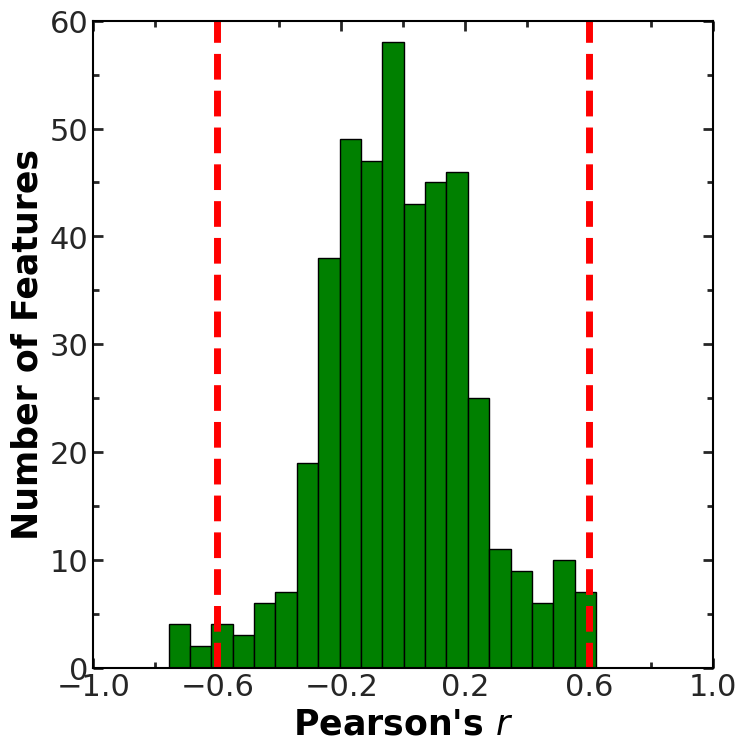

In [81]:
target_column = 'MFPT'

# Filter columns without "<NA>"

# Remove rows with missing values in the target_column
df_merged_cleaned = df_merged

# Calculating Pearson correlation coefficients
correlation_coefficients = {}
for column in valid_columns:
    if column != target_column:
        # Remove rows with missing values in the current column
        #df_column_cleaned = df_merged_cleaned.dropna(subset=[column])
        df_column_cleaned = df_merged_cleaned

        # Calculate Pearson correlation coefficient
        correlation_coefficients[column] = pearsonr(df_column_cleaned[target_column], df_column_cleaned[column])[0]

# Plotting the histogram
plt.figure(figsize = (8,8.4))
#plt.grid(False)
Tr=0.6
#bins = [-1,-0.8,-0.60,-0.4,-0.2,0,0.2,0.4,0.6,0.8,1.0]
plt.hist(correlation_coefficients.values(), bins=20, color = 'green', edgecolor = 'black', )
#locs, labels = plt.yticks() 
plt.vlines(x=-Tr,ymin=0,ymax=387,color='r',linestyle='--',linewidth=5)
plt.vlines(x=Tr,ymin=0,ymax=387,color='r',linestyle='--',linewidth=5)

#plt.savefig('corr_distributions.pdf', bbox_inches='tight')
plt.ylim([0,60])
plt.xlim([-1,1])
plt.grid(False)
plt.xlabel("Pearson's $r$", fontsize=25, color='black', fontweight='bold')
plt.ylabel('Number of Features', fontsize=25, color='black', fontweight='bold')
# Set the size of x-ticks and y-ticks
#plt.xticks(fontsize=19)  # Indicate the size of x-ticks
#plt.yticks(fontsize=19)  # Indicate the size of y-ticks
# Mirror the x-ticks and y-ticks
plt.tick_params(axis='x', which='major', bottom=True, top=True, direction='in', labelsize=22, width=2, length=7)
plt.tick_params(axis='x', which='minor', bottom=True, top=True, direction='in', labelsize=22, width=2, length=4)
plt.tick_params(axis='y', which='major', left=True, right=True, direction='in', labelsize=22, width=2, length=7)
plt.tick_params(axis='y', which='minor', left=True, right=True, direction='in', labelsize=22, width=2, length=4)

plt.minorticks_on()
# Add one minor tick in between each pair of major ticks on x-axis and y-axis
plt.gca().xaxis.set_minor_locator(AutoMinorLocator(2))
plt.gca().yaxis.set_minor_locator(AutoMinorLocator(2))

# Add panel label
#plt.text(-0.135, 1.08, 'A', transform=plt.gca().transAxes, fontsize=35, fontweight='bold', va='top')

#plt.xticks([-1,-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8,1.0])
plt.xticks([-1,-0.6,-0.2,0.2,0.6,1.0])
#plt.tick_params(labelsize=20) #12.5
plt.rcParams["axes.edgecolor"]="black"
plt.rcParams["axes.linewidth"]=1.5
#plt.figtext(0.45,0.94,'(a)',size=40)
#plt.savefig('S2A.pdf', bbox_inches='tight')

# Correlation values between MFPT and all physico-chemical features

Correlation between MFPT and MoreauBrotoAuto_Polarizability6: -0.7292


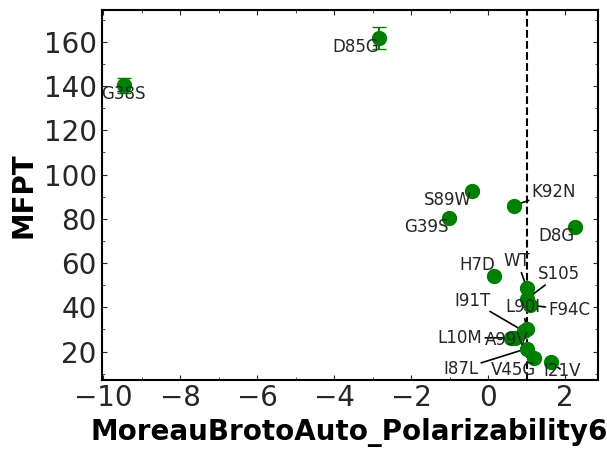

Correlation between MFPT and MoreauBrotoAuto_Polarizability7: -0.6933


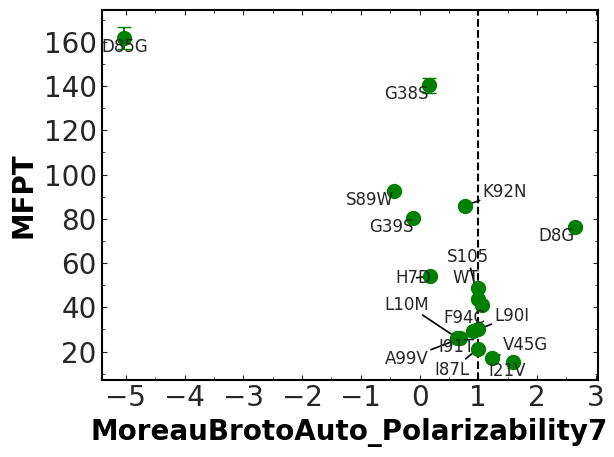

Correlation between MFPT and MoreauBrotoAuto_ResidueVol2: -0.6839


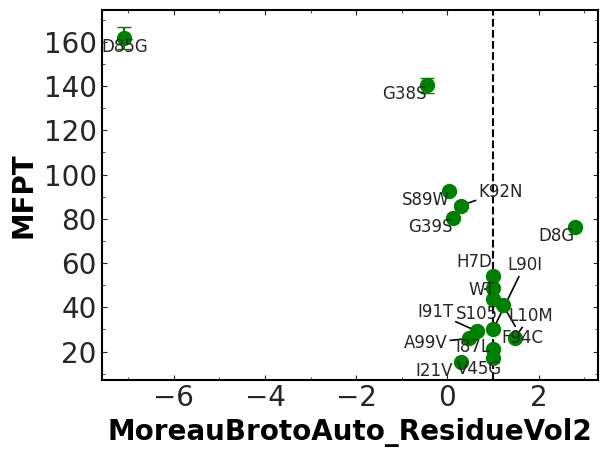

Correlation between MFPT and MoreauBrotoAuto_ResidueVol3: -0.6354


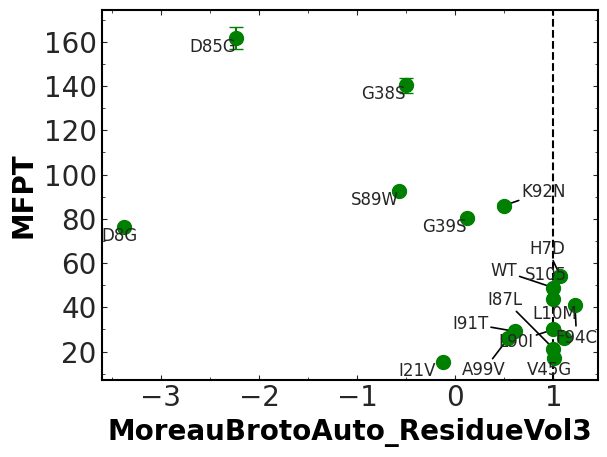

Correlation between MFPT and MoreauBrotoAuto_Mutability6: -0.7027


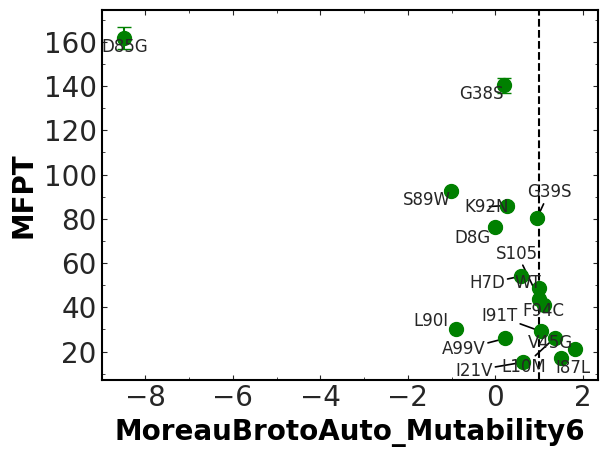

Correlation between MFPT and MoranAuto_ResidueVol1: -0.7571


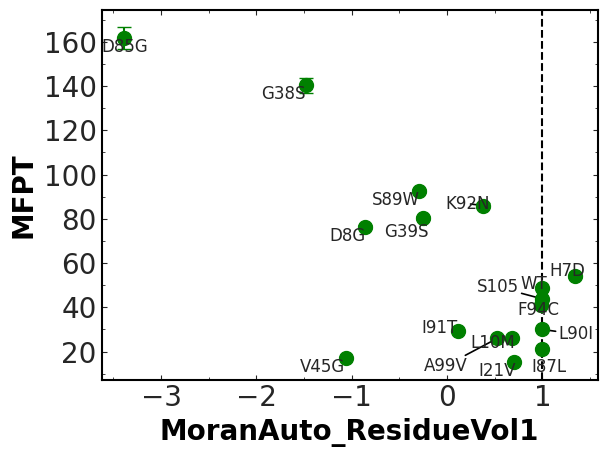

Correlation between MFPT and _SolventAccessibilityD2001: 0.6220


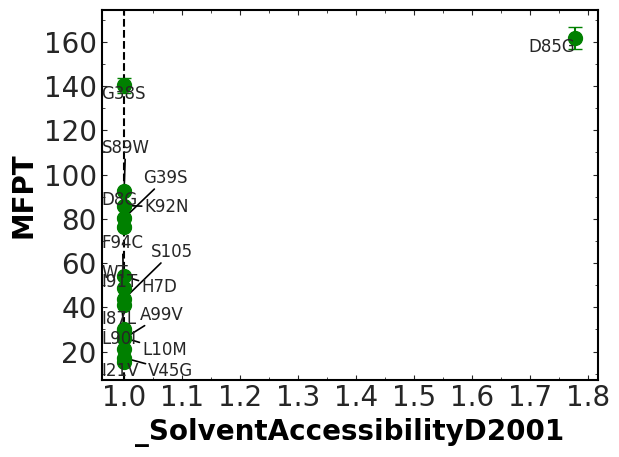

Correlation between MFPT and _PolarityD3001: 0.6220


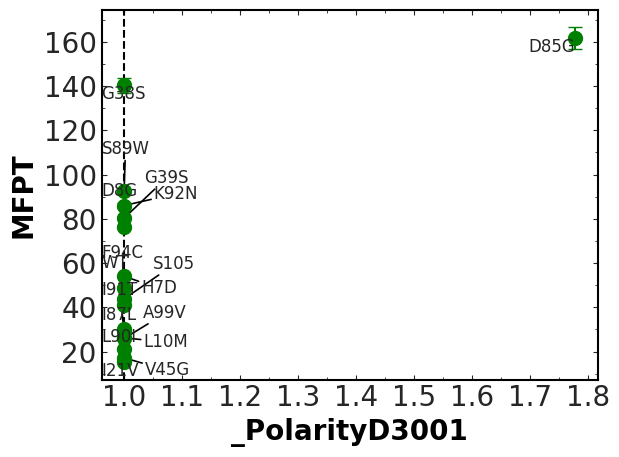

Correlation between MFPT and _HydrophobicityD1001: 0.6220


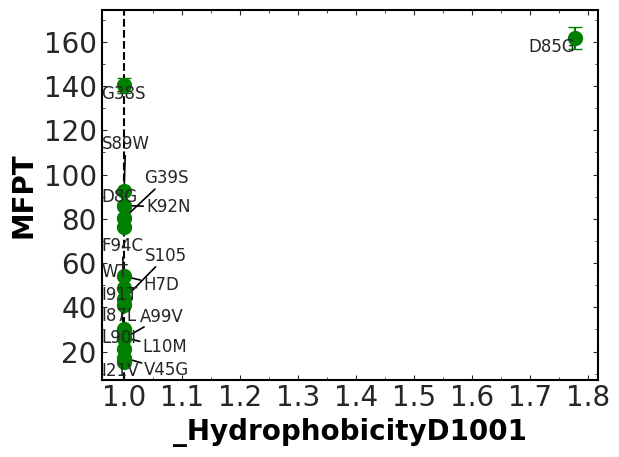

In [82]:
target_column = 'MFPT'
stderr_column = 'Stderr_MFPT'  # Define stderr_column
features_MFPT=[]

# Assuming df_merged_cleaned, valid_columns, target_column, and features_MFPT are defined
for column in valid_columns:
    if column != target_column:
        # Remove rows with missing values in the current column or target column
        df_column_cleaned = df_merged_cleaned.dropna(subset=[column, target_column])

        # Calculate Pearson correlation coefficient
        corr_coef, p_value = pearsonr(df_column_cleaned[target_column], df_column_cleaned[column])

        # Check the condition and add to features_MFPT if true
        if abs(corr_coef) > 0.6 and p_value < 0.05:
            features_MFPT.append(column)
            print(f'Correlation between {target_column} and {column}: {corr_coef:.4f}')
           
            # Plotting with annotations based on 'Mutants' column
            plt.figure()
            for _, row in df_column_cleaned.iterrows():
                plt.errorbar(row[column], row[target_column], yerr=row[stderr_column], fmt='o', label=row['Mutants_aa'], color='green', capsize=5, markersize=10)  # Plot point with error bars
                #plt.text(row[column], row[target_column], row['Mutants_aa'], fontsize=12)  # Annotate point
                
            texts = [plt.text(row[column], row[target_column], row['Mutants_aa'], fontsize=12) for _, row in df_column_cleaned.iterrows()]  # Create a list of texts
            
            # Adjust the position of labels to avoid overlap
            adjust_text(texts, arrowprops=dict(arrowstyle='->', color='black', lw=1.2), force_text=(0.2, 0.8),)
                
            plt.axvline(x=1, color='k', linestyle='--')  # 'k' for black color, '--' for dashed line
                       
            plt.grid(False)

            plt.xlabel(column, fontsize=20, color='black', fontweight='bold')
            plt.ylabel(target_column, fontsize=20, color='black', fontweight='bold')
            # Set the size of x-ticks and y-ticks
            plt.xticks(fontsize=20)  # Indicate the size of x-ticks
            plt.yticks(fontsize=20)  # Indicate the size of y-ticks
            # Mirror the x-ticks and y-ticks
            plt.tick_params(axis='x', which='both', bottom=True, top=True, direction='in')
            plt.tick_params(axis='y', which='both', left=True, right=True, direction='in')
            plt.minorticks_on()
            # Add one minor tick in between each pair of major ticks on x-axis and y-axis
            plt.gca().xaxis.set_minor_locator(AutoMinorLocator(2))
            plt.gca().yaxis.set_minor_locator(AutoMinorLocator(2))
            plt.show()


# Selected Features for MFPT

/tmp/ipykernel_2086491/3039165061.py:64: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Adjust the layout


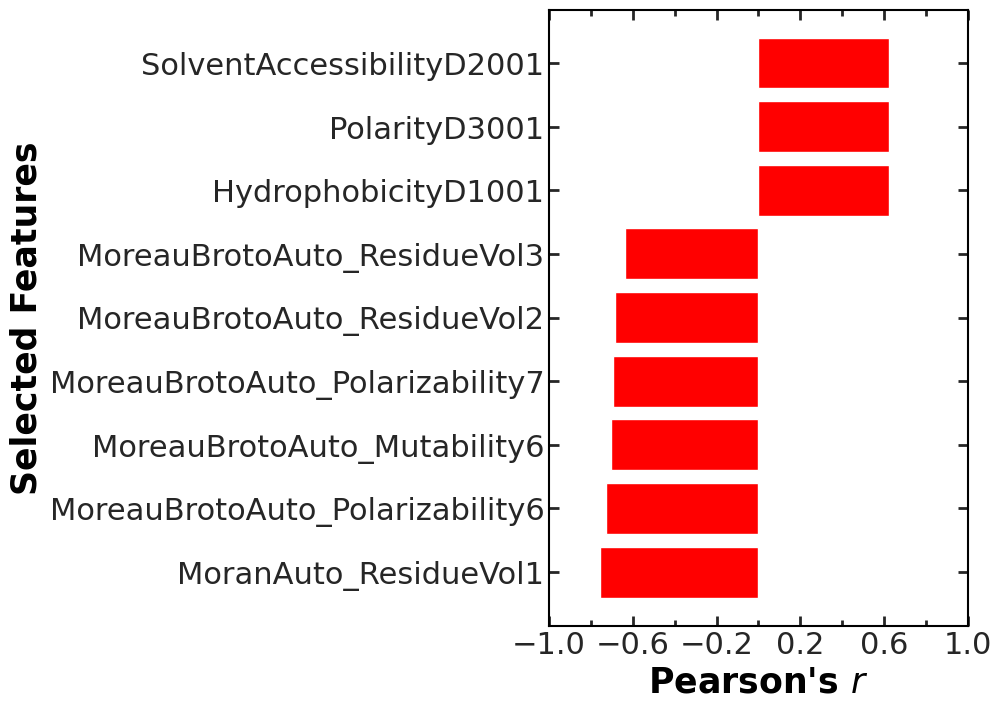

In [111]:
# Assuming Tr is defined somewhere above in your script
Tr = 0.6

selected_features_TI = []
pearson_coefficients = [] 
feature_names = []

# Loop through each feature and calculate Pearson correlation
for column in features_MFPT:
    correlation, p_value  = pearsonr(df_column_cleaned['MFPT'], df_column_cleaned[column])

    # Check if the absolute correlation is larger than Tr and p-value is less than 0.05
    if abs(correlation) > Tr and p_value < 0.05:
        # Remove underscore from feature name if it starts with "_"
        if column.startswith("_"):
            column = column[1:]
        selected_features_TI.append(column)
        pearson_coefficients.append(correlation)
        feature_names.append(column)

# Check if there are any significant features to plot
if feature_names:
    # Sort features based on their coefficients
    sorted_indices = np.argsort(np.abs(pearson_coefficients))[::-1]
    sorted_feature_names = [feature_names[i] for i in sorted_indices]
    sorted_pearson_coefficients = [pearson_coefficients[i] for i in sorted_indices]

    # Now, plot the significant Pearson correlation coefficients
    plt.figure(figsize=(5.4,8))  # Adjust the figure size as necessary, depending on the number of features
    #plt.figure(figsize=(10.5,7))  # Adjust the figure size as necessary, depending on the number of features
    plt.barh(sorted_feature_names, sorted_pearson_coefficients, color='red')

    # Set the range and increments for the x-axis
    plt.xticks(np.arange(-1, 1.2, 0.4))  # np.arange includes the start value but excludes the end value, hence 1.2 to include 1.0

    # Add labels and title
    plt.xlabel("Pearson's $r$", fontsize=25, color='black', fontweight='bold')
    plt.ylabel('Selected Features', fontsize=25, color='black', fontweight='bold')

    
    # Set the size of x-ticks and y-ticks
    #plt.xticks(fontsize=20)  # Indicate the size of x-ticks
    #plt.yticks(fontsize=20)  # Indicate the size of y-ticks
    # Mirror the x-ticks and y-ticks
    plt.tick_params(axis='x', which='major', bottom=True, top=True, direction='in', labelsize=22, width=2, length=7)
    plt.tick_params(axis='x', which='minor', bottom=True, top=True, direction='in', labelsize=22, width=2, length=4)
    plt.tick_params(axis='y', which='major', left=True, right=True, direction='in', labelsize=22, width=2, length=7)
    plt.tick_params(axis='y', which='minor', left=True, right=True, direction='in', labelsize=22, width=2, length=4)

    plt.minorticks_on()
    # Add one minor tick in between each pair of major ticks on x-axis and y-axis
    plt.gca().xaxis.set_minor_locator(AutoMinorLocator(2))
    plt.gca().yaxis.set_minor_locator(AutoMinorLocator(1))

    # Add panel name
    #plt.text(-1.3, 1.08, 'B', transform=plt.gca().transAxes, fontsize=35, fontweight='bold', va='top')

    #plt.tick_params(labelsize=20)
    plt.rcParams["axes.edgecolor"]="black"
    plt.rcParams["axes.linewidth"]=1.5
    # Rotate the feature names for better readability, if necessary
    plt.yticks(rotation=0)  
    plt.grid(False)
    plt.tight_layout()  # Adjust the layout

    # Save the plot
    #plt.figtext(0.7,1.02,'(b)',size=40)
    #plt.savefig('S2B_R8.pdf', bbox_inches='tight')
    plt.show()  # Uncomment if you want to display the plot as well
else:
    print("No features met the significance criteria for plotting.")


# Correlation between MFPT and a Selected Feature with Mutation Names

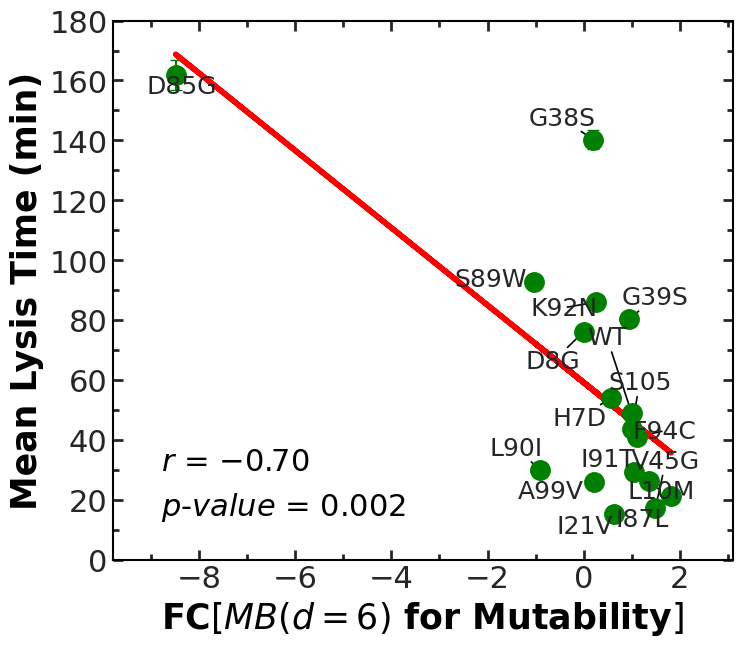

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from matplotlib.ticker import AutoMinorLocator
from adjustText import adjust_text  # Import adjust_text

target_column = 'MFPT'
stderr_column = 'Stderr_MFPT'  # Define stderr_column

# Convert data types to numeric if necessary
df_column_cleaned[column] = pd.to_numeric(df_column_cleaned[column], errors='coerce')
df_column_cleaned[target_column] = pd.to_numeric(df_column_cleaned[target_column], errors='coerce')

# Exclude specific mutations
#exclude_mutations = ["L90I", "I87L"]
exclude_mutations = []
df_filtered = df_column_cleaned[~df_column_cleaned['Mutants_aa'].isin(exclude_mutations)]

plt.figure(figsize=(8, 7))

column = 'MoreauBrotoAuto_Mutability6'
mutation_names = df_filtered['Mutants_aa']  # Assuming mutation names are stored in 'Mutation' column

for mutation, x, y, err in zip(mutation_names, df_filtered[column], df_filtered[target_column], df_filtered[stderr_column]):
    plt.errorbar(x, y, yerr=err, fmt='o', color='green', capsize=4, markersize=14)  # Plot point with error bars

texts = [plt.text(x, y, mutation, fontsize=18, ha='center', va='bottom') for mutation, x, y in
         zip(mutation_names, df_filtered[column], df_filtered[target_column])]
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='black', lw=1.2), force_text=(0.2, 0.8))

# Fit a line (1st-degree polynomial) to the data
coefficients = np.polyfit(df_filtered[column], df_filtered[target_column], 1)
line_function = np.poly1d(coefficients)
plt.plot(df_filtered[column], line_function(df_filtered[column]), '-', color='red', linewidth=4)

plt.axis([-9.8, 3.1, 0, 180])
plt.xticks([-8,-6,-4,-2,0,2])
plt.yticks([0, 20, 40, 60, 80, 100, 120, 140, 160, 180])
plt.grid(False)
plt.xlabel('FC$[MB(d=6)$ for Mutability$]$', fontsize=25, color='black', fontweight='bold')
plt.ylabel('Mean Lysis Time (min)', fontsize=25, color='black', fontweight='bold')
plt.tick_params(axis='x', which='major', bottom=True, top=True, direction='in', labelsize=22, width=2, length=7)
plt.tick_params(axis='x', which='minor', bottom=True, top=True, direction='in', labelsize=22, width=2, length=4)
plt.tick_params(axis='y', which='major', left=True, right=True, direction='in', labelsize=22, width=2, length=7)
plt.tick_params(axis='y', which='minor', left=True, right=True, direction='in', labelsize=22, width=2, length=4)
plt.minorticks_on()
plt.gca().xaxis.set_minor_locator(AutoMinorLocator(2))
plt.gca().yaxis.set_minor_locator(AutoMinorLocator(1))
#plt.text(-0.17, 1.12, 'A', transform=plt.gca().transAxes, fontsize=35, fontweight='bold', va='top')
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1.5
plt.minorticks_on()
plt.gca().xaxis.set_minor_locator(AutoMinorLocator(2))
plt.gca().yaxis.set_minor_locator(AutoMinorLocator(2))
correlation_coefficient, p_value = pearsonr(df_filtered[column], df_filtered[target_column])
plt.text(-8.8, 30, f'$r$ = ${correlation_coefficient:.2f}$', fontsize=22, color='black')
plt.text(-8.8, 15, f'$p$-$value$ = {p_value:.3f}', fontsize=22, color='black')
#plt.savefig('S5A_R8.pdf', bbox_inches='tight')
plt.show()

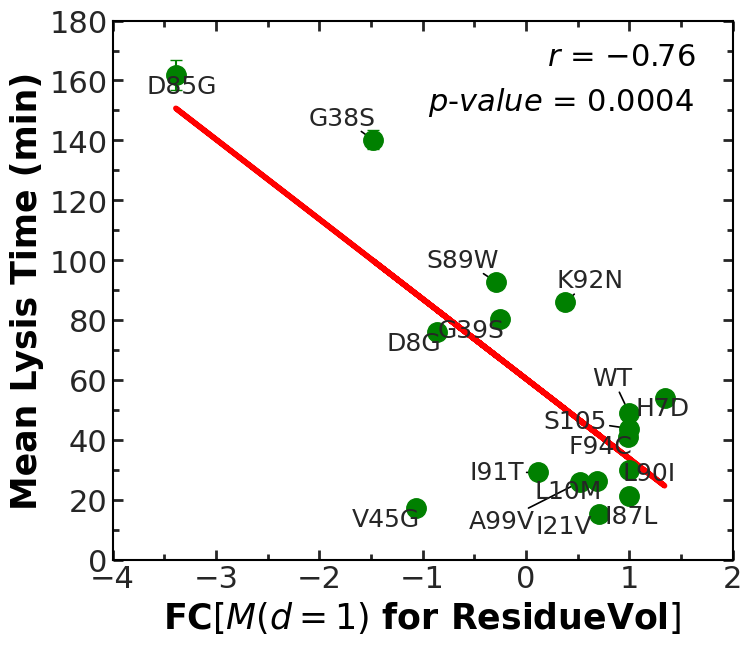

In [93]:
target_column = 'MFPT'
stderr_column = 'Stderr_MFPT'  # Define stderr_column

# Convert data types to numeric if necessary
df_column_cleaned[column] = pd.to_numeric(df_column_cleaned[column], errors='coerce')
df_column_cleaned[target_column] = pd.to_numeric(df_column_cleaned[target_column], errors='coerce')

# Exclude specific mutations
#exclude_mutations = ["L90I", "I87L"]
exclude_mutations = []
df_filtered = df_column_cleaned[~df_column_cleaned['Mutants_aa'].isin(exclude_mutations)]

plt.figure(figsize=(8, 7))

column = 'MoranAuto_ResidueVol1'
mutation_names = df_filtered['Mutants_aa']  # Assuming mutation names are stored in 'Mutation' column

for mutation, x, y, err in zip(mutation_names, df_filtered[column], df_filtered[target_column], df_filtered[stderr_column]):
    plt.errorbar(x, y, yerr=err, fmt='o', color='green', capsize=4, markersize=14)  # Plot point with error bars

texts = [plt.text(x, y, mutation, fontsize=18, ha='center', va='bottom') for mutation, x, y in
         zip(mutation_names, df_filtered[column], df_filtered[target_column])]
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='black', lw=1.2), force_text=(0.2, 0.8))

# Fit a line (1st-degree polynomial) to the data
coefficients = np.polyfit(df_filtered[column], df_filtered[target_column], 1)
line_function = np.poly1d(coefficients)
plt.plot(df_filtered[column], line_function(df_filtered[column]), '-', color='red', linewidth=4)

plt.axis([-4, 2, 0, 180])
plt.xticks([-4,-3,-2,-1,0,1,2])
plt.yticks([0, 20, 40, 60, 80, 100, 120, 140, 160, 180])
plt.grid(False)
plt.xlabel('FC$[M(d=1)$ for ResidueVol$]$', fontsize=25, color='black', fontweight='bold')
plt.ylabel('Mean Lysis Time (min)', fontsize=25, color='black', fontweight='bold')   
plt.tick_params(axis='x', which='major', bottom=True, top=True, direction='in', labelsize=22, width=2, length=7)
plt.tick_params(axis='x', which='minor', bottom=True, top=True, direction='in', labelsize=22, width=2, length=4)
plt.tick_params(axis='y', which='major', left=True, right=True, direction='in', labelsize=22, width=2, length=7)
plt.tick_params(axis='y', which='minor', left=True, right=True, direction='in', labelsize=22, width=2, length=4)
plt.minorticks_on()
plt.gca().xaxis.set_minor_locator(AutoMinorLocator(2))
plt.gca().yaxis.set_minor_locator(AutoMinorLocator(1))
#plt.text(-0.17, 1.12, 'B', transform=plt.gca().transAxes, fontsize=35, fontweight='bold', va='top')
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1.5
plt.minorticks_on()
plt.gca().xaxis.set_minor_locator(AutoMinorLocator(2))
plt.gca().yaxis.set_minor_locator(AutoMinorLocator(2))
correlation_coefficient, p_value = pearsonr(df_filtered[column], df_filtered[target_column])
plt.text(0.2, 165, f'$r$ = ${correlation_coefficient:.2f}$', fontsize=22, color='black')
plt.text(-0.95, 150, f'$p$-$value$ = {p_value:.4f}', fontsize=22, color='black')
#plt.savefig('S5B_R8.pdf', bbox_inches='tight')
plt.show()

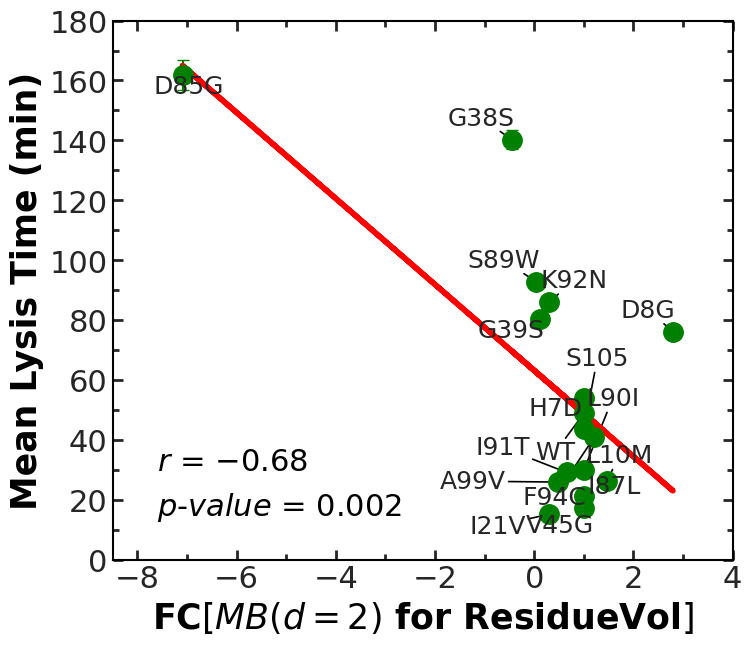

In [95]:
target_column = 'MFPT'
stderr_column = 'Stderr_MFPT'  # Define stderr_column

# Convert data types to numeric if necessary
df_column_cleaned[column] = pd.to_numeric(df_column_cleaned[column], errors='coerce')
df_column_cleaned[target_column] = pd.to_numeric(df_column_cleaned[target_column], errors='coerce')

# Exclude specific mutations
#exclude_mutations = ["L90I", "I87L"]
exclude_mutations = []
df_filtered = df_column_cleaned[~df_column_cleaned['Mutants_aa'].isin(exclude_mutations)]

plt.figure(figsize=(8, 7))

column = 'MoreauBrotoAuto_ResidueVol2'
mutation_names = df_filtered['Mutants_aa']  # Assuming mutation names are stored in 'Mutation' column

for mutation, x, y, err in zip(mutation_names, df_filtered[column], df_filtered[target_column], df_filtered[stderr_column]):
    plt.errorbar(x, y, yerr=err, fmt='o', color='green', capsize=4, markersize=14)  # Plot point with error bars

texts = [plt.text(x, y, mutation, fontsize=18, ha='center', va='bottom') for mutation, x, y in
         zip(mutation_names, df_filtered[column], df_filtered[target_column])]
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='black', lw=1.2), force_text=(0.2, 0.8))

# Fit a line (1st-degree polynomial) to the data
coefficients = np.polyfit(df_filtered[column], df_filtered[target_column], 1)
line_function = np.poly1d(coefficients)
plt.plot(df_filtered[column], line_function(df_filtered[column]), '-', color='red', linewidth=4)

plt.axis([-8.5, 4, 0, 180])
plt.xticks([-8,-6,-4,-2,0,2,4])
plt.yticks([0, 20, 40, 60, 80, 100, 120, 140, 160, 180])
plt.grid(False)
plt.xlabel('FC$[MB(d=2)$ for ResidueVol$]$', fontsize=25, color='black', fontweight='bold')
plt.ylabel('Mean Lysis Time (min)', fontsize=25, color='black', fontweight='bold')   
plt.tick_params(axis='x', which='major', bottom=True, top=True, direction='in', labelsize=22, width=2, length=7)
plt.tick_params(axis='x', which='minor', bottom=True, top=True, direction='in', labelsize=22, width=2, length=4)
plt.tick_params(axis='y', which='major', left=True, right=True, direction='in', labelsize=22, width=2, length=7)
plt.tick_params(axis='y', which='minor', left=True, right=True, direction='in', labelsize=22, width=2, length=4)
plt.minorticks_on()
plt.gca().xaxis.set_minor_locator(AutoMinorLocator(2))
plt.gca().yaxis.set_minor_locator(AutoMinorLocator(1))
#plt.text(-0.17, 1.12, 'C', transform=plt.gca().transAxes, fontsize=35, fontweight='bold', va='top')
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1.5
plt.minorticks_on()
plt.gca().xaxis.set_minor_locator(AutoMinorLocator(2))
plt.gca().yaxis.set_minor_locator(AutoMinorLocator(2))
correlation_coefficient, p_value = pearsonr(df_filtered[column], df_filtered[target_column])
plt.text(-7.6, 30, f'$r$ = ${correlation_coefficient:.2f}$', fontsize=22, color='black')
plt.text(-7.6, 15, f'$p$-$value$ = {p_value:.3f}', fontsize=22, color='black')
#plt.savefig('S5C_R8.pdf', bbox_inches='tight')
plt.show()

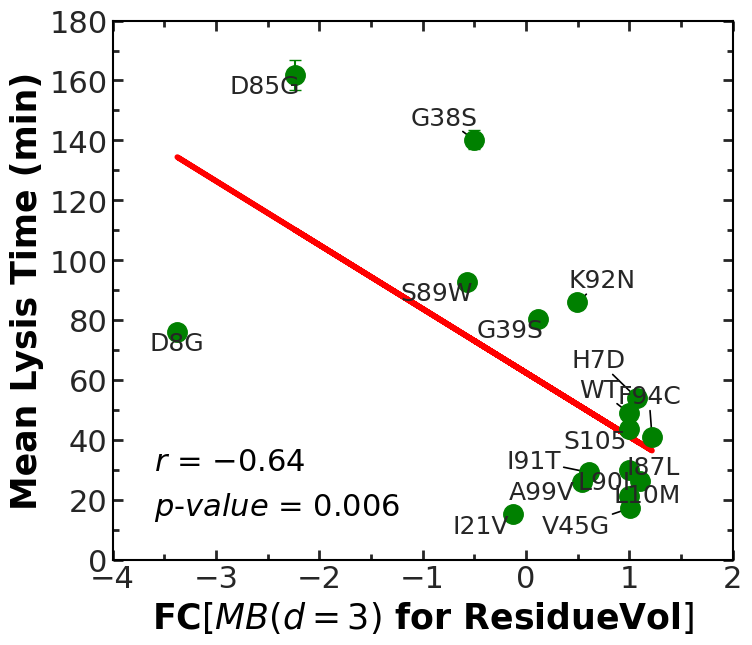

In [97]:
target_column = 'MFPT'
stderr_column = 'Stderr_MFPT'  # Define stderr_column

# Convert data types to numeric if necessary
df_column_cleaned[column] = pd.to_numeric(df_column_cleaned[column], errors='coerce')
df_column_cleaned[target_column] = pd.to_numeric(df_column_cleaned[target_column], errors='coerce')

# Exclude specific mutations
#exclude_mutations = ["L90I", "I87L"]
exclude_mutations = []
df_filtered = df_column_cleaned[~df_column_cleaned['Mutants_aa'].isin(exclude_mutations)]

plt.figure(figsize=(8, 7))

column = 'MoreauBrotoAuto_ResidueVol3'
mutation_names = df_filtered['Mutants_aa']  # Assuming mutation names are stored in 'Mutation' column

for mutation, x, y, err in zip(mutation_names, df_filtered[column], df_filtered[target_column], df_filtered[stderr_column]):
    plt.errorbar(x, y, yerr=err, fmt='o', color='green', capsize=4, markersize=14)  # Plot point with error bars

texts = [plt.text(x, y, mutation, fontsize=18, ha='center', va='bottom') for mutation, x, y in
         zip(mutation_names, df_filtered[column], df_filtered[target_column])]
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='black', lw=1.2), force_text=(0.2, 0.8))

# Fit a line (1st-degree polynomial) to the data
coefficients = np.polyfit(df_filtered[column], df_filtered[target_column], 1)
line_function = np.poly1d(coefficients)
plt.plot(df_filtered[column], line_function(df_filtered[column]), '-', color='red', linewidth=4)

plt.axis([-4, 2, 0, 180])
plt.xticks([-4,-3,-2,-1,0,1,2])
plt.yticks([0, 20, 40, 60, 80, 100, 120, 140, 160, 180])
plt.grid(False)
plt.xlabel('FC$[MB(d=3)$ for ResidueVol$]$', fontsize=25, color='black', fontweight='bold')
plt.ylabel('Mean Lysis Time (min)', fontsize=25, color='black', fontweight='bold')   
plt.tick_params(axis='x', which='major', bottom=True, top=True, direction='in', labelsize=22, width=2, length=7)
plt.tick_params(axis='x', which='minor', bottom=True, top=True, direction='in', labelsize=22, width=2, length=4)
plt.tick_params(axis='y', which='major', left=True, right=True, direction='in', labelsize=22, width=2, length=7)
plt.tick_params(axis='y', which='minor', left=True, right=True, direction='in', labelsize=22, width=2, length=4)
plt.minorticks_on()
plt.gca().xaxis.set_minor_locator(AutoMinorLocator(2))
plt.gca().yaxis.set_minor_locator(AutoMinorLocator(1))
#plt.text(-0.17, 1.12, 'D', transform=plt.gca().transAxes, fontsize=35, fontweight='bold', va='top')
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1.5
plt.minorticks_on()
plt.gca().xaxis.set_minor_locator(AutoMinorLocator(2))
plt.gca().yaxis.set_minor_locator(AutoMinorLocator(2))
correlation_coefficient, p_value = pearsonr(df_filtered[column], df_filtered[target_column])
plt.text(-3.6, 30, f'$r$ = ${correlation_coefficient:.2f}$', fontsize=22, color='black')
plt.text(-3.6, 15, f'$p$-$value$ = {p_value:.3f}', fontsize=22, color='black')
#plt.savefig('S5D_R8.pdf', bbox_inches='tight')
plt.show()

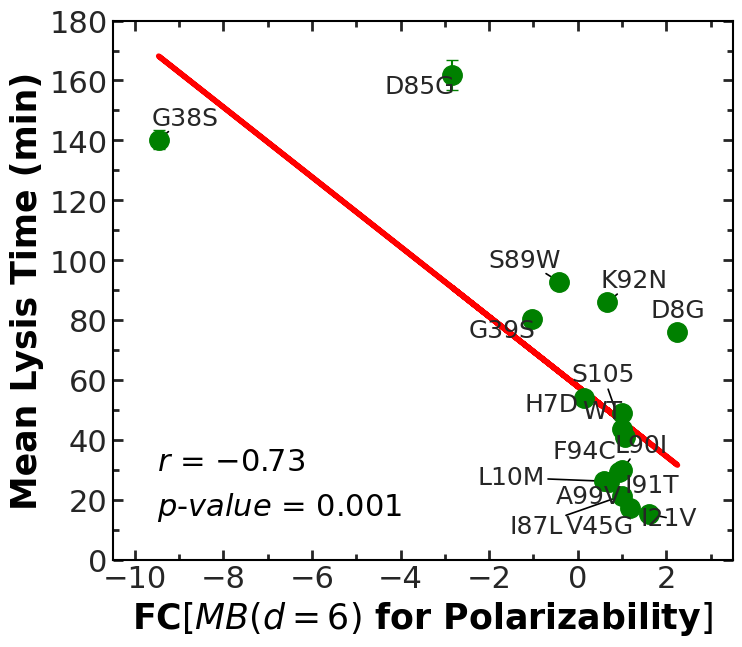

In [99]:
target_column = 'MFPT'
stderr_column = 'Stderr_MFPT'  # Define stderr_column

# Convert data types to numeric if necessary
df_column_cleaned[column] = pd.to_numeric(df_column_cleaned[column], errors='coerce')
df_column_cleaned[target_column] = pd.to_numeric(df_column_cleaned[target_column], errors='coerce')

# Exclude specific mutations
#exclude_mutations = ["L90I", "I87L"]
exclude_mutations = []
df_filtered = df_column_cleaned[~df_column_cleaned['Mutants_aa'].isin(exclude_mutations)]

plt.figure(figsize=(8, 7))

column = 'MoreauBrotoAuto_Polarizability6'
mutation_names = df_filtered['Mutants_aa']  # Assuming mutation names are stored in 'Mutation' column

for mutation, x, y, err in zip(mutation_names, df_filtered[column], df_filtered[target_column], df_filtered[stderr_column]):
    plt.errorbar(x, y, yerr=err, fmt='o', color='green', capsize=4, markersize=14)  # Plot point with error bars

texts = [plt.text(x, y, mutation, fontsize=18, ha='center', va='bottom') for mutation, x, y in
         zip(mutation_names, df_filtered[column], df_filtered[target_column])]
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='black', lw=1.2), force_text=(0.2, 0.8))

# Fit a line (1st-degree polynomial) to the data
coefficients = np.polyfit(df_filtered[column], df_filtered[target_column], 1)
line_function = np.poly1d(coefficients)
plt.plot(df_filtered[column], line_function(df_filtered[column]), '-', color='red', linewidth=4)

plt.axis([-10.5, 3.5, 0, 180])
plt.xticks([-10,-8,-6,-4,-2,0,2])
plt.yticks([0, 20, 40, 60, 80, 100, 120, 140, 160, 180])
plt.grid(False)
plt.xlabel('FC$[MB(d=6)$ for Polarizability$]$', fontsize=25, color='black', fontweight='bold')
plt.ylabel('Mean Lysis Time (min)', fontsize=25, color='black', fontweight='bold')   
plt.tick_params(axis='x', which='major', bottom=True, top=True, direction='in', labelsize=22, width=2, length=7)
plt.tick_params(axis='x', which='minor', bottom=True, top=True, direction='in', labelsize=22, width=2, length=4)
plt.tick_params(axis='y', which='major', left=True, right=True, direction='in', labelsize=22, width=2, length=7)
plt.tick_params(axis='y', which='minor', left=True, right=True, direction='in', labelsize=22, width=2, length=4)
plt.minorticks_on()
plt.gca().xaxis.set_minor_locator(AutoMinorLocator(2))
plt.gca().yaxis.set_minor_locator(AutoMinorLocator(1))
#plt.text(-0.17, 1.12, 'E', transform=plt.gca().transAxes, fontsize=35, fontweight='bold', va='top')
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1.5
plt.minorticks_on()
plt.gca().xaxis.set_minor_locator(AutoMinorLocator(2))
plt.gca().yaxis.set_minor_locator(AutoMinorLocator(2))
correlation_coefficient, p_value = pearsonr(df_filtered[column], df_filtered[target_column])
plt.text(-9.5, 30, f'$r$ = ${correlation_coefficient:.2f}$', fontsize=22, color='black')
plt.text(-9.5, 15, f'$p$-$value$ = {p_value:.3f}', fontsize=22, color='black')
#plt.savefig('S5E_R8.pdf', bbox_inches='tight')
plt.show()

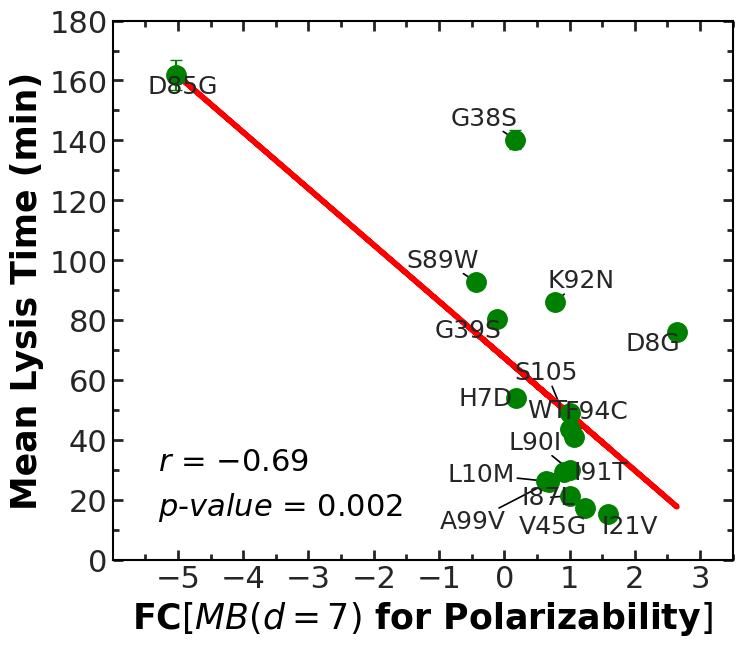

In [101]:
target_column = 'MFPT'
stderr_column = 'Stderr_MFPT'  # Define stderr_column

# Convert data types to numeric if necessary
df_column_cleaned[column] = pd.to_numeric(df_column_cleaned[column], errors='coerce')
df_column_cleaned[target_column] = pd.to_numeric(df_column_cleaned[target_column], errors='coerce')

# Exclude specific mutations
#exclude_mutations = ["L90I", "I87L"]
exclude_mutations = []
df_filtered = df_column_cleaned[~df_column_cleaned['Mutants_aa'].isin(exclude_mutations)]

plt.figure(figsize=(8, 7))

column = 'MoreauBrotoAuto_Polarizability7'
mutation_names = df_filtered['Mutants_aa']  # Assuming mutation names are stored in 'Mutation' column

for mutation, x, y, err in zip(mutation_names, df_filtered[column], df_filtered[target_column], df_filtered[stderr_column]):
    plt.errorbar(x, y, yerr=err, fmt='o', color='green', capsize=4, markersize=14)  # Plot point with error bars

texts = [plt.text(x, y, mutation, fontsize=18, ha='center', va='bottom') for mutation, x, y in
         zip(mutation_names, df_filtered[column], df_filtered[target_column])]
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='black', lw=1.2), force_text=(0.2, 0.8))

# Fit a line (1st-degree polynomial) to the data
coefficients = np.polyfit(df_filtered[column], df_filtered[target_column], 1)
line_function = np.poly1d(coefficients)
plt.plot(df_filtered[column], line_function(df_filtered[column]), '-', color='red', linewidth=4)

plt.axis([-6, 3.5, 0, 180])
plt.xticks([-5,-4,-3,-2,-1,0,1,2,3])
plt.yticks([0, 20, 40, 60, 80, 100, 120, 140, 160, 180])
plt.grid(False)
plt.xlabel('FC$[MB(d=7)$ for Polarizability$]$', fontsize=25, color='black', fontweight='bold')
plt.ylabel('Mean Lysis Time (min)', fontsize=25, color='black', fontweight='bold')   
plt.tick_params(axis='x', which='major', bottom=True, top=True, direction='in', labelsize=22, width=2, length=7)
plt.tick_params(axis='x', which='minor', bottom=True, top=True, direction='in', labelsize=22, width=2, length=4)
plt.tick_params(axis='y', which='major', left=True, right=True, direction='in', labelsize=22, width=2, length=7)
plt.tick_params(axis='y', which='minor', left=True, right=True, direction='in', labelsize=22, width=2, length=4)
plt.minorticks_on()
plt.gca().xaxis.set_minor_locator(AutoMinorLocator(2))
plt.gca().yaxis.set_minor_locator(AutoMinorLocator(1))
#plt.text(-0.17, 1.12, 'F', transform=plt.gca().transAxes, fontsize=35, fontweight='bold', va='top')
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1.5
plt.minorticks_on()
plt.gca().xaxis.set_minor_locator(AutoMinorLocator(2))
plt.gca().yaxis.set_minor_locator(AutoMinorLocator(2))
correlation_coefficient, p_value = pearsonr(df_filtered[column], df_filtered[target_column])
plt.text(-5.3, 30, f'$r$ = ${correlation_coefficient:.2f}$', fontsize=22, color='black')
plt.text(-5.3, 15, f'$p$-$value$ = {p_value:.3f}', fontsize=22, color='black')
#plt.savefig('S5F_R8.pdf', bbox_inches='tight')
plt.show()

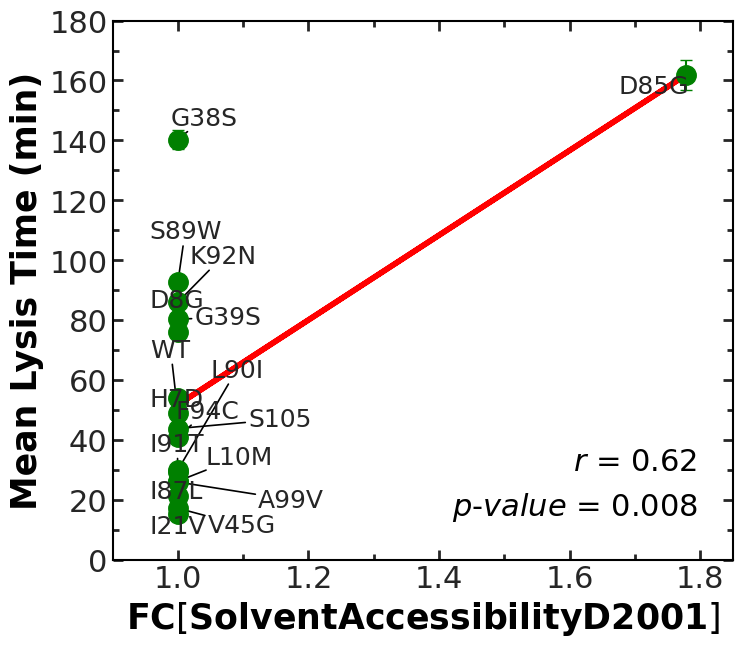

In [103]:
target_column = 'MFPT'
stderr_column = 'Stderr_MFPT'  # Define stderr_column

# Convert data types to numeric if necessary
df_column_cleaned[column] = pd.to_numeric(df_column_cleaned[column], errors='coerce')
df_column_cleaned[target_column] = pd.to_numeric(df_column_cleaned[target_column], errors='coerce')

# Exclude specific mutations
#exclude_mutations = ["L90I", "I87L"]
exclude_mutations = []
df_filtered = df_column_cleaned[~df_column_cleaned['Mutants_aa'].isin(exclude_mutations)]

plt.figure(figsize=(8, 7))

column = '_SolventAccessibilityD2001'
mutation_names = df_filtered['Mutants_aa']  # Assuming mutation names are stored in 'Mutation' column

for mutation, x, y, err in zip(mutation_names, df_filtered[column], df_filtered[target_column], df_filtered[stderr_column]):
    plt.errorbar(x, y, yerr=err, fmt='o', color='green', capsize=4, markersize=14)  # Plot point with error bars

texts = [plt.text(x, y, mutation, fontsize=18, ha='center', va='bottom') for mutation, x, y in
         zip(mutation_names, df_filtered[column], df_filtered[target_column])]
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='black', lw=1.2), force_text=(0.2, 0.8))

# Fit a line (1st-degree polynomial) to the data
coefficients = np.polyfit(df_filtered[column], df_filtered[target_column], 1)
line_function = np.poly1d(coefficients)
plt.plot(df_filtered[column], line_function(df_filtered[column]), '-', color='red', linewidth=4)

plt.axis([0.9, 1.85, 0, 180])
plt.xticks([1,1.2,1.4,1.6,1.8])
plt.yticks([0, 20, 40, 60, 80, 100, 120, 140, 160, 180])
plt.grid(False)
plt.xlabel('FC$[$SolventAccessibilityD2001$]$', fontsize=25, color='black', fontweight='bold')
plt.ylabel('Mean Lysis Time (min)', fontsize=25, color='black', fontweight='bold')   
plt.tick_params(axis='x', which='major', bottom=True, top=True, direction='in', labelsize=22, width=2, length=7)
plt.tick_params(axis='x', which='minor', bottom=True, top=True, direction='in', labelsize=22, width=2, length=4)
plt.tick_params(axis='y', which='major', left=True, right=True, direction='in', labelsize=22, width=2, length=7)
plt.tick_params(axis='y', which='minor', left=True, right=True, direction='in', labelsize=22, width=2, length=4)
plt.minorticks_on()
plt.gca().xaxis.set_minor_locator(AutoMinorLocator(2))
plt.gca().yaxis.set_minor_locator(AutoMinorLocator(1))
#plt.text(-0.17, 1.12, 'G', transform=plt.gca().transAxes, fontsize=35, fontweight='bold', va='top')
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1.5
plt.minorticks_on()
plt.gca().xaxis.set_minor_locator(AutoMinorLocator(2))
plt.gca().yaxis.set_minor_locator(AutoMinorLocator(2))
correlation_coefficient, p_value = pearsonr(df_filtered[column], df_filtered[target_column])
plt.text(1.605, 30, f'$r$ = ${correlation_coefficient:.2f}$', fontsize=22, color='black')
plt.text(1.42, 15, f'$p$-$value$ = {p_value:.3f}', fontsize=22, color='black')
#plt.savefig('S5G_R8.pdf', bbox_inches='tight')
plt.show()

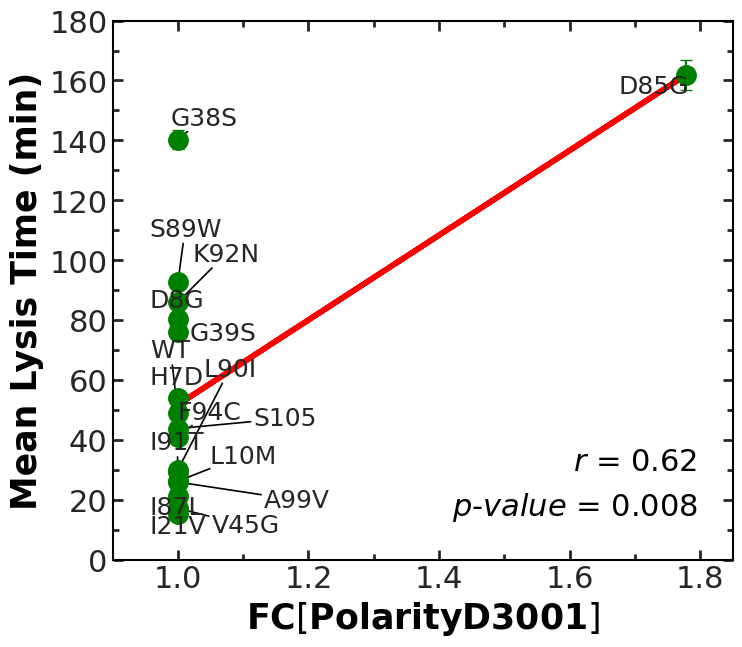

In [105]:
target_column = 'MFPT'
stderr_column = 'Stderr_MFPT'  # Define stderr_column

# Convert data types to numeric if necessary
df_column_cleaned[column] = pd.to_numeric(df_column_cleaned[column], errors='coerce')
df_column_cleaned[target_column] = pd.to_numeric(df_column_cleaned[target_column], errors='coerce')

# Exclude specific mutations
#exclude_mutations = ["L90I", "I87L"]
exclude_mutations = []
df_filtered = df_column_cleaned[~df_column_cleaned['Mutants_aa'].isin(exclude_mutations)]

plt.figure(figsize=(8, 7))

column = '_PolarityD3001'
mutation_names = df_filtered['Mutants_aa']  # Assuming mutation names are stored in 'Mutation' column

for mutation, x, y, err in zip(mutation_names, df_filtered[column], df_filtered[target_column], df_filtered[stderr_column]):
    plt.errorbar(x, y, yerr=err, fmt='o', color='green', capsize=4, markersize=14)  # Plot point with error bars

texts = [plt.text(x, y, mutation, fontsize=18, ha='center', va='bottom') for mutation, x, y in
         zip(mutation_names, df_filtered[column], df_filtered[target_column])]
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='black', lw=1.2), force_text=(0.2, 0.8))

# Fit a line (1st-degree polynomial) to the data
coefficients = np.polyfit(df_filtered[column], df_filtered[target_column], 1)
line_function = np.poly1d(coefficients)
plt.plot(df_filtered[column], line_function(df_filtered[column]), '-', color='red', linewidth=4)

plt.axis([0.9, 1.85, 0, 180])
plt.xticks([1,1.2,1.4,1.6,1.8])
plt.yticks([0, 20, 40, 60, 80, 100, 120, 140, 160, 180])
plt.grid(False)
plt.xlabel('FC$[$PolarityD3001$]$', fontsize=25, color='black', fontweight='bold')
plt.ylabel('Mean Lysis Time (min)', fontsize=25, color='black', fontweight='bold')   
plt.tick_params(axis='x', which='major', bottom=True, top=True, direction='in', labelsize=22, width=2, length=7)
plt.tick_params(axis='x', which='minor', bottom=True, top=True, direction='in', labelsize=22, width=2, length=4)
plt.tick_params(axis='y', which='major', left=True, right=True, direction='in', labelsize=22, width=2, length=7)
plt.tick_params(axis='y', which='minor', left=True, right=True, direction='in', labelsize=22, width=2, length=4)
plt.minorticks_on()
plt.gca().xaxis.set_minor_locator(AutoMinorLocator(2))
plt.gca().yaxis.set_minor_locator(AutoMinorLocator(1))
#plt.text(-0.17, 1.12, 'H', transform=plt.gca().transAxes, fontsize=35, fontweight='bold', va='top')
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1.5
plt.minorticks_on()
plt.gca().xaxis.set_minor_locator(AutoMinorLocator(2))
plt.gca().yaxis.set_minor_locator(AutoMinorLocator(2))
correlation_coefficient, p_value = pearsonr(df_filtered[column], df_filtered[target_column])
plt.text(1.605, 30, f'$r$ = ${correlation_coefficient:.2f}$', fontsize=22, color='black')
plt.text(1.42, 15, f'$p$-$value$ = {p_value:.3f}', fontsize=22, color='black')
#plt.savefig('S5H_R8.pdf', bbox_inches='tight')
plt.show()

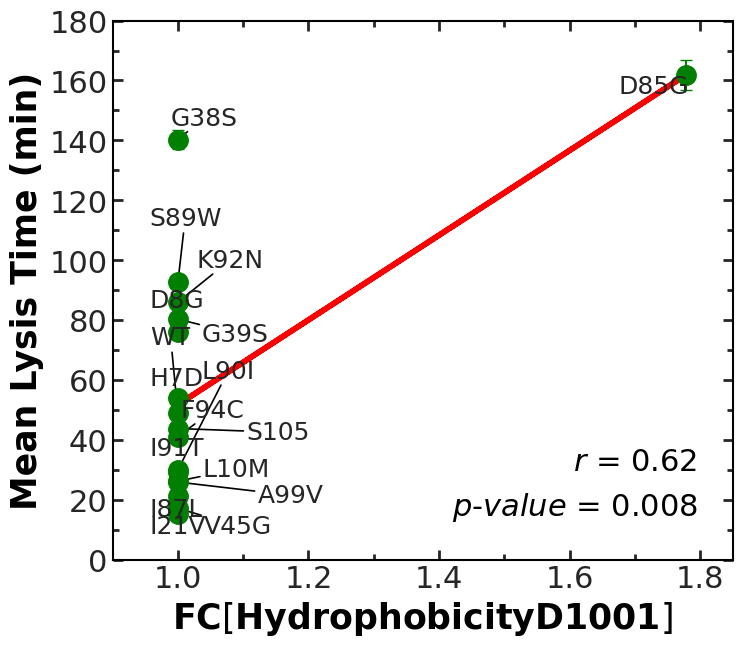

In [107]:
target_column = 'MFPT'
stderr_column = 'Stderr_MFPT'  # Define stderr_column

# Convert data types to numeric if necessary
df_column_cleaned[column] = pd.to_numeric(df_column_cleaned[column], errors='coerce')
df_column_cleaned[target_column] = pd.to_numeric(df_column_cleaned[target_column], errors='coerce')

# Exclude specific mutations
#exclude_mutations = ["L90I", "I87L"]
exclude_mutations = []
df_filtered = df_column_cleaned[~df_column_cleaned['Mutants_aa'].isin(exclude_mutations)]

plt.figure(figsize=(8, 7))

column = '_HydrophobicityD1001'
mutation_names = df_filtered['Mutants_aa']  # Assuming mutation names are stored in 'Mutation' column

for mutation, x, y, err in zip(mutation_names, df_filtered[column], df_filtered[target_column], df_filtered[stderr_column]):
    plt.errorbar(x, y, yerr=err, fmt='o', color='green', capsize=4, markersize=14)  # Plot point with error bars

texts = [plt.text(x, y, mutation, fontsize=18, ha='center', va='bottom') for mutation, x, y in
         zip(mutation_names, df_filtered[column], df_filtered[target_column])]
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='black', lw=1.2), force_text=(0.2, 0.8))

# Fit a line (1st-degree polynomial) to the data
coefficients = np.polyfit(df_filtered[column], df_filtered[target_column], 1)
line_function = np.poly1d(coefficients)
plt.plot(df_filtered[column], line_function(df_filtered[column]), '-', color='red', linewidth=4)

plt.axis([0.9, 1.85, 0, 180])
plt.xticks([1,1.2,1.4,1.6,1.8])
plt.yticks([0, 20, 40, 60, 80, 100, 120, 140, 160, 180])
plt.grid(False)
plt.xlabel('FC$[$HydrophobicityD1001$]$', fontsize=25, color='black', fontweight='bold')
plt.ylabel('Mean Lysis Time (min)', fontsize=25, color='black', fontweight='bold')   
plt.tick_params(axis='x', which='major', bottom=True, top=True, direction='in', labelsize=22, width=2, length=7)
plt.tick_params(axis='x', which='minor', bottom=True, top=True, direction='in', labelsize=22, width=2, length=4)
plt.tick_params(axis='y', which='major', left=True, right=True, direction='in', labelsize=22, width=2, length=7)
plt.tick_params(axis='y', which='minor', left=True, right=True, direction='in', labelsize=22, width=2, length=4)
plt.minorticks_on()
plt.gca().xaxis.set_minor_locator(AutoMinorLocator(2))
plt.gca().yaxis.set_minor_locator(AutoMinorLocator(1))
#plt.text(-0.16, 1.12, 'I', transform=plt.gca().transAxes, fontsize=35, fontweight='bold', va='top')
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1.5
plt.minorticks_on()
plt.gca().xaxis.set_minor_locator(AutoMinorLocator(2))
plt.gca().yaxis.set_minor_locator(AutoMinorLocator(2))
correlation_coefficient, p_value = pearsonr(df_filtered[column], df_filtered[target_column])
plt.text(1.605, 30, f'$r$ = ${correlation_coefficient:.2f}$', fontsize=22, color='black')
plt.text(1.42, 15, f'$p$-$value$ = {p_value:.3f}', fontsize=22, color='black')
#plt.savefig('S5I_R8.pdf', bbox_inches='tight')
plt.show()